<center><h1>M1 MMA - Optimisation</h1><h2>TP1 : familiarisation avec la représentation de fonctions de plusieurs variables. Interprétations qualitatives du gradient.</h2></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

1) On considère la fonction $h : x=(x_0,x_1)\in\mathbb{R}^2\mapsto x_0 + x_1$. Ecrire en Python une telle fonction, que l'on appellera $\verb+h+$.

In [2]:
def h(x):
    return x[0] + x[1]

2)a) Décrire le fonctionnement de la fonction $\verb+np.meshgrid+$ en prenant des exemples simples. On pourra s'aider de la documentation en ligne.

In [3]:
x0, x1 = [0, 0.5, 1], [0, 0.2, 0.6, 0.9]
X0, X1 = np.meshgrid(x0, x1)
print(X0)
print(X1)

[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]]
[[0.  0.  0. ]
 [0.2 0.2 0.2]
 [0.6 0.6 0.6]
 [0.9 0.9 0.9]]


On remarque que $\verb+X0+$ et $\verb+X1+$ sont de dimensions $\verb+len(x0)+ \times \verb+len(x1)+$ et que pour tout $(i,j)$, $\verb+(X0[i,j], X1[i,j])+$ est le point d'abscisse $\verb+x0[i]+$ et d'ordonnée $\verb+x1[j]+$. La fonction $\verb+np.meshgrid+$, appliquée à $\verb+x0+$ et $\verb+x1+$, permet donc de générer une grille $2$D dont les coordonnées des abscisses sont données par la grille $1$D $\verb+x0+$ et les ordonnées par la grille $1$D $\verb+x1+$.

2)b) Afficher le résultat de la commande $\verb+h([X0, X1])+$. Qu'obtenez-vous ?

In [4]:
print(h([X0,X1]))

[[0.  0.5 1. ]
 [0.2 0.7 1.2]
 [0.6 1.1 1.6]
 [0.9 1.4 1.9]]


$\verb+h([X0, X1])+$ renvoie un tableau de valeurs de même dimension que la grille $2$D décrite précedemment. Le coefficient $(i,j)$ de ce tableau est simplement l'évaluation de $\verb+h+$ au point d'indice $(i,j)$ de la grille, c'est-à-dire en $\verb+(X0[i,j], X1[i,j])+$, ou encore $(\verb+x0[i]+,\verb+x1[j]+)$.

3) Dans cette question nous souhaitons ne pas utiliser la commande $\verb+h([X0, X1])+$, mais tout de même obtenir le même résultat via une méthode alternative.

On utilisera des boucles $\verb+for+$ et stockera le résultat dans une variable $\verb+Z+$.

In [5]:
Z = np.zeros([len(x1), len(x0)])
for i in range(len(x1)):
    for j in range(len(x0)):
        Z[i, j] = h([X0[i,j], X1[i,j]])
print(Z)

[[0.  0.5 1. ]
 [0.2 0.7 1.2]
 [0.6 1.1 1.6]
 [0.9 1.4 1.9]]


On considère la fonction dite "quadratique" suivante définie pour tout $x=(x_0,x_1)\in\mathbb{R}^2$ par :
$$
f(x) = x_0^2 + 2 x_1^2 + x_0x_1 + x_0 - 3x_1 + 30.
$$

Dans la suite on va la représenter graphiquement de différentes manières.

4) Ecrire la fonction $\verb+f+$ représentant $f$, en Python.

In [6]:
def f(x):
    return x[0]**2 + 2*x[1]**2 + x[0]*x[1] + x[0] - 3*x[1] + 30

5) Représenter le graphe de la fonction $f$ sur le domaine $[-3,3]\times [-3,3]$, c'est-à-dire l'ensemble
$$G_f \cap \left([-3,3]\times [-3,3] \times \mathbb{R}\right),$$
où
$$G_f = \{(x_0,x_1,x_2)\in\mathbb{R}^3 : (x_0,x_1)\in\mathbb{R}^2, x_2 - f(x_0,x_1) = 0\} = \{(x_0,x_1,f(x_0,x_1))\in\mathbb{R}^3 : (x_0,x_1)\in\mathbb{R}^2\},$$
est le graphe de $f$.

On utilisera la fonction plot_surface.

In [7]:
s_grid = 200 # nombre de points sur la grille en X et en Y
dom = [-3, 3, -3, 3]
X0, X1 = np.linspace(dom[0], dom[1], s_grid), np.linspace(dom[2], dom[3], s_grid)
X0, X1 = np.meshgrid(X0, X1)
Z = np.zeros([s_grid, s_grid])
for i in range(s_grid):
    for j in range(s_grid):
        Z[i, j] = f([X0[i,j], X1[i,j]])

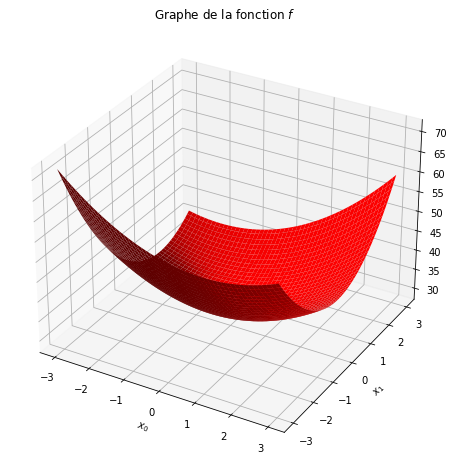

In [8]:
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')
ax.plot_surface(X0, X1, Z, color = "red")
ax.set_title('Graphe de la fonction $f$')
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
plt.show()

6) Représenter les ensembles de niveau de la fonction $f$, toujours sur le même domaine. On utilisera la fonction $\verb+contour+$.

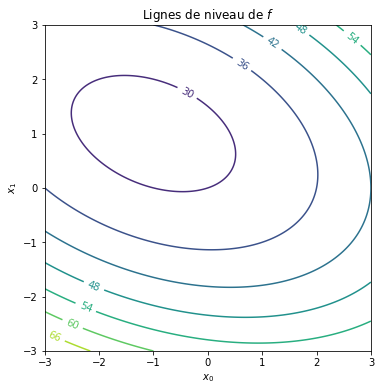

In [9]:
fig, ax = plt.subplots(figsize = (6, 6))
CS = ax.contour(X0, X1, Z)
ax.clabel(CS, fontsize = 10)
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
ax.set_title('Lignes de niveau de $f$')
ax.set_aspect('equal', adjustable = 'box') # pour que les axes aient la même échelle

7) Donner la matrice symétrique $A$, le vecteur $b$ et la constante $c$ pour lesquelles
$$
f(x) = x_0^2 + 2 x_1^2 + x_0x_1 + x_0 - 3x_1 + 30 = \frac{1}{2} \langle Ax, x \rangle - \langle b, x \rangle + c,
$$
où $x=(x_0 \,\, x_1)^T$.

8) En déduire $\nabla f(x)$ pour tout $x$.

9) En supposant qu'il existe, calculer le minimiseur $x^*$ de $f$.

10) Ecrire la fonction $\verb+gradf+$ représentant $\nabla f$ en Python. On prendra soin à ce que la fonction renvoie un objet de type $\verb+array+$.

Correction :

7) On raisonne par identification. Les coefficients diagonaux de $A$ sont deux fois (car $\frac12$ devant le produit scalaire) les coefficients devant les termes au carré, les termes antidiagonaux sont donnés par le coeff devant $x_0x_1$. On a donc
$$
    A = \begin{pmatrix} 2 & 1 \\ 1 & 4\end{pmatrix}.
$$
On trouve directement $b=[-1,3]$, et $c=30$.

8) Calcul déjà vu en cours, il suffit de repartir de la définition de la différentiabilité en développant $f(x+h)$ et en regroupant par termes de différents ordres. On trouve $\nabla f(x) = Ax-b$.

9) N'importe quel minimiseur $x$ de $f$ est un point critique de $f$ (bientôt vu en cours), c'est à dire vérifie $\nabla f(x) = 0$. Donc les minimiseurs de $f$ sont nécessairement des solutions de l'équation linéaire $Ax = b$. Or $A$ est inversible (déterminant vaut $7$) donc ce système linéaire admet une unique solution. On a donc bien un unique minimiseur qui vaut $x^* = A^{-1}b$. On pourrait justifier l'existence mais nous verrons ça plus tard. Une morale de cet exemple est la suivante : résoudre un système linéaire $Ax=b$ où $A$ est inversible est équivalent à trouver le minimum de la fonction $f$ définie par $f(x) = \frac{1}{2} \langle Ax, x \rangle - \langle b, x \rangle$, donc résoudre un problème d'optimisation. Cela ouvre donc vers d'autres outils pratiques pour la résolution de systèmes linéaires.

In [10]:
# Réponse à 10)
def gradf(x):
    gx0 = 2*x[0] + x[1] + 1
    gx1 = 4*x[1] + x[0] - 3
    return np.array([gx0, gx1])

11) On rappelle que le graphe de $f$, noté $G_f$ est défini par 
$$G_f = \{(x_0,x_1,x_2)\in\mathbb{R}^3 : (x_0,x_1)\in\mathbb{R}^2, x_2 - f(x_0,x_1) = 0\} = \{(x_0,x_1,f(x_0,x_1))\in\mathbb{R}^3 : (x_0,x_1)\in\mathbb{R}^2\},$$
i.e. $G_f = g_f^{-1}(\{0\})$ où $g_f : (x_0,x_1,x_2)\in\mathbb{R}^3\mapsto x_2 - f(x_0,x_1)$.

Soit $u\in\mathbb{R}^2$. Définir $T_{u,f}:\mathbb{R}^2\to\mathbb{R}$ telle que 
$$ P_{u,f} = \{(x, T_{u,f}(x)) = (x_0,x_1,T_{u,f}(x_0,x_1))\in\mathbb{R}^3 : x = (x_0,x_1)\in\mathbb{R}^2\},$$
est le plan tangent à $G_f = g_f^{-1}(\{0\})$ en $(u,f(u))\in G_f$. 

On a par définition $G_f = g_f^{-1}(\{0\})$ et $\nabla g_f((u, f(u))$ est orthogonal à $G_f$, ensemble de niveau $0$ de $g$, en $(u,f(u))$. Or pour tout $x = (x_0,x_1)\in\mathbb{R}^2$, $x_2\in\mathbb{R}$, $\nabla g(x,x_2) = (-\nabla f(x), 1)$. D'où l'ensemble des $(x,x_2)\in P_{u,f}$ (plan tangent à $G_f$ en $(u, f(u))$) sont définies par l'équation
$$\left\langle (-\nabla f(x), 1), (x,x_2) - (u, f(u))\right\rangle = 0,\\
\Leftrightarrow x_2 - f(u) = \langle \nabla f(x), x - u\rangle,\\
\Leftrightarrow x_2 = f(u) + \langle\nabla f(x), x - u\rangle.$$
Posons donc $T_{u,f}(x) = f(u) + \langle\nabla f(x), x - u\rangle$, pour tout $x = (x_0,x_1)$, on a bien $(x,T_f(x))\in P_{u,f}$.

12) Implémenter $T_{u,f}$ en Python. Puis tracer sur le même graphe $3$D, le graphe $G_f$ de $f$ et le plan tangent à $G_f$ en $(u,f(u))$, avec $u$ que vous choisirez.

In [11]:
u = [0, 0] # on va considérer le plan tangent à G_f en (0, 0, f((0, 0)))
def Tuf(x):
    return  f(u) + np.dot(gradf(u), x - u)
T = np.zeros([s_grid, s_grid])
for i in range(s_grid):
    for j in range(s_grid):
        T[i, j] = Tuf(np.array([X0[i,j], X1[i,j]]))

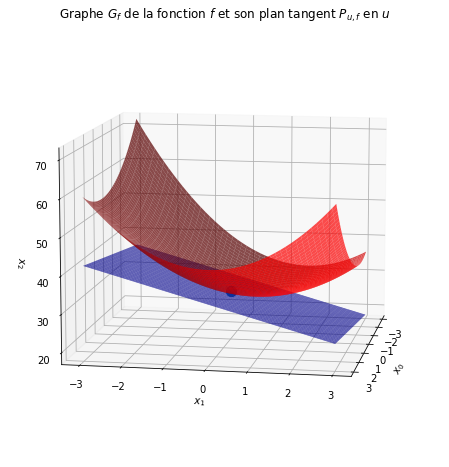

In [12]:
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')
ax.plot_surface(X0, X1, T, alpha = 0.7, color = "blue")
ax.plot_surface(X0, X1, Z, alpha = 0.7, color = "red")
ax.plot([u[0], u[0]], [u[1], u[1]], [f(u), f(u)], marker = "o", ms = 10)
ax.set_title('Graphe $G_f$ de la fonction $f$ et son plan tangent $P_{u,f}$ en $u$')
ax.view_init(10, 10)
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$x_2$")
plt.show()

13) Représenter sur le même graphe, les ensembles de niveau de $f$ (toujours sur le même domaine $[-3,3]\times[3,3]$) et son champs de gradient. On pourra penser à utiliser la fonction $\verb+plt.quiver+$.

Que remarque-t-on ?

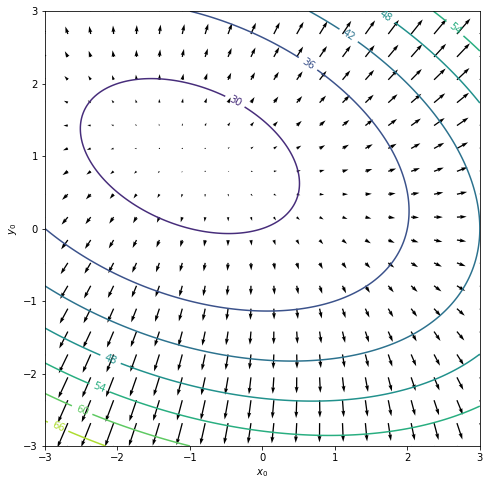

In [13]:
X0, X1 = np.linspace(dom[0], dom[1], 200), np.linspace(dom[2], dom[3], 200)
X0, X1 = np.meshgrid(X0, X1)
Z = f([X0, X1])

# grille moins fine pour le champs de gradient.
X0g, X1g = np.linspace(dom[0], dom[1], 20), np.linspace(dom[2], dom[3], 20) # grille plus grossiere
X0g, X1g = np.meshgrid(X0g, X1g)
u, v = gradf([X0g, X1g])
    
fig, ax = plt.subplots(figsize = (8, 8))
CS = ax.contour(X0, X1, Z)
ax.clabel(CS, fontsize = 10)
plt.quiver(X0g, X1g, u, v)
ax.set_aspect('equal', adjustable = 'box')
ax.set_xlabel("$x_0$")
ax.set_ylabel("$y_0$")
plt.show()